   Unnamed: 0        STATE/UT       DISTRICT  Year  Rape  \
0           0  ANDHRA PRADESH       ADILABAD  2001    50   
1           1  ANDHRA PRADESH      ANANTAPUR  2001    23   
2           2  ANDHRA PRADESH       CHITTOOR  2001    27   
3           3  ANDHRA PRADESH       CUDDAPAH  2001    20   
4           4  ANDHRA PRADESH  EAST GODAVARI  2001    23   

   Kidnapping and Abduction  Dowry Deaths  \
0                        30            16   
1                        30             7   
2                        34            14   
3                        20            17   
4                        26            12   

   Assault on women with intent to outrage her modesty  \
0                                                149     
1                                                118     
2                                                112     
3                                                126     
4                                                109     

   Insult to modest

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10820\1793937149.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_by_state_df, x='STATE/UT', y='Total Crimes', palette='viridis')


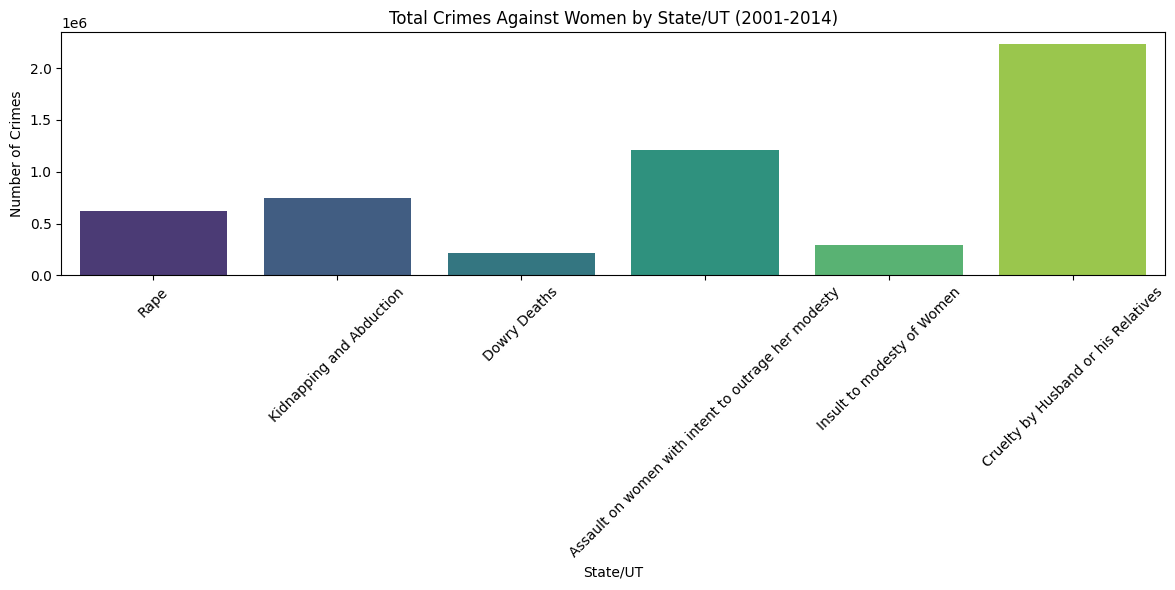

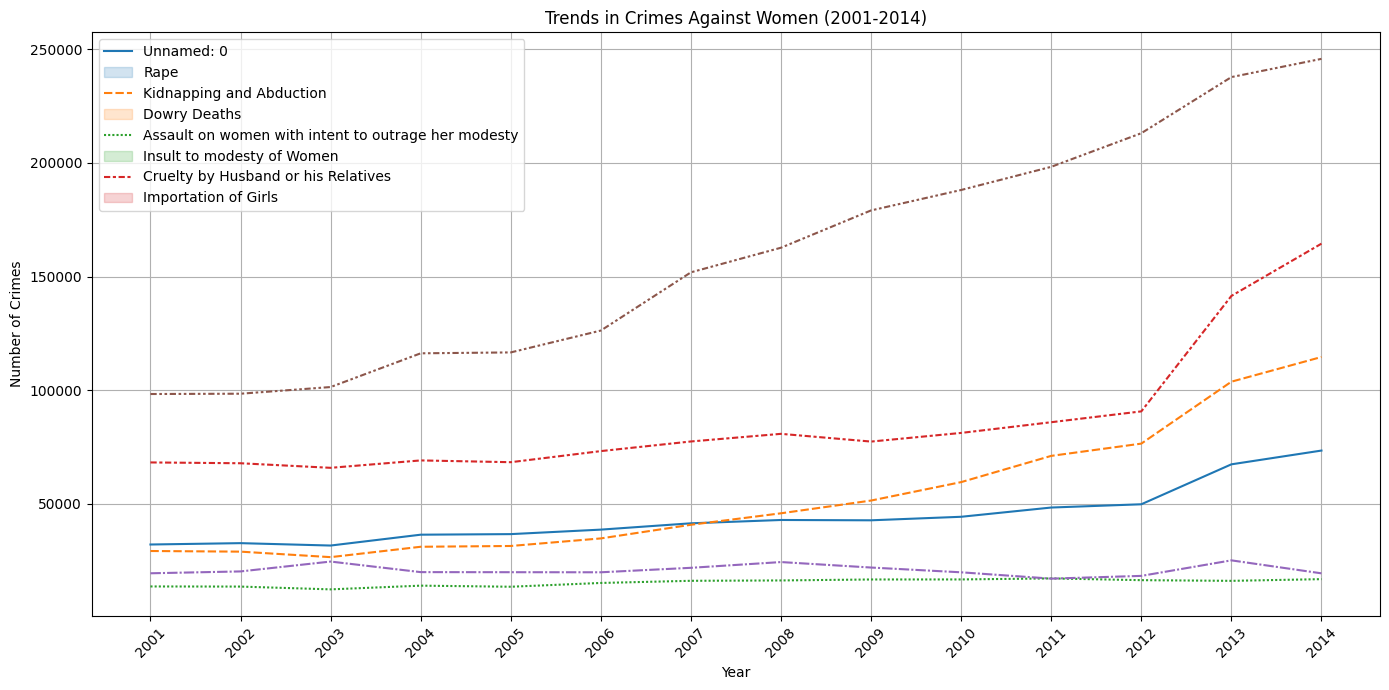

Model Accuracy: 0.31


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
file_path = r"F:\Documents\crimes_against_women_2001-2014.csv"  # Update with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Data Cleaning
# Convert 'Year' to category if necessary and remove missing values
data['Year'] = data['Year'].astype(str)
data = data.dropna()

# Exploratory Data Analysis (EDA)
# 1. Identify states with the highest crime rates
crime_by_state = data[['STATE/UT', 'Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
                        'Assault on women with intent to outrage her modesty',
                        'Insult to modesty of Women', 'Cruelty by Husband or his Relatives']].sum()

# Convert to DataFrame for easier plotting
crime_by_state_df = crime_by_state.reset_index()
crime_by_state_df.columns = ['STATE/UT', 'Total Crimes']

# Check for any non-numeric values in the total crimes
print(crime_by_state_df)

# Ensure 'Total Crimes' is numeric, coercing errors to NaN
crime_by_state_df['Total Crimes'] = pd.to_numeric(crime_by_state_df['Total Crimes'], errors='coerce')

# Drop any rows with NaN values in 'Total Crimes'
crime_by_state_df = crime_by_state_df.dropna()

# Convert data types
crime_by_state_df['STATE/UT'] = crime_by_state_df['STATE/UT'].astype(str)
crime_by_state_df['Total Crimes'] = crime_by_state_df['Total Crimes'].astype(int)

# Plotting the total crimes against women by State/UT
plt.figure(figsize=(12, 6))
sns.barplot(data=crime_by_state_df, x='STATE/UT', y='Total Crimes', palette='viridis')
plt.title('Total Crimes Against Women by State/UT (2001-2014)')
plt.xlabel('State/UT')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

# 2. Examine trends over the years
yearly_crime_counts = data.groupby('Year').sum(numeric_only=True)

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_crime_counts[['Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
                                         'Assault on women with intent to outrage her modesty',
                                         'Insult to modesty of Women', 'Cruelty by Husband or his Relatives']])
plt.title('Trends in Crimes Against Women (2001-2014)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(yearly_crime_counts.columns)
plt.grid()
plt.tight_layout()
plt.show()

# 3. Predictive Modeling (optional)
# Preparing data for prediction (features and target variable)
features = data[['Year', 'Rape', 'Kidnapping and Abduction', 'Dowry Deaths']]
target = data['STATE/UT']  # Assuming we want to classify by state

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluating the model
accuracy = rf_model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2f}')
